In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drive-pdfs/maroc_books_datasets.csv


In [2]:
books = pd.read_csv("/kaggle/input/drive-pdfs/maroc_books_datasets.csv",na_values=["None",np.nan])[["pages","year","size","downloads","languge"]]
books

,pages,year,size,downloads,languge
0,453 Pages,2012,11.63 MB,3151 Downloads,French
1,358 Pages,2010,26.56 MB,653 Downloads,French
2,108 Pages,2017,857 KB,2462 Downloads,French
3,392 Pages,2012,2.57 MB,1013 Downloads,French
4,343 Pages,2014,1.44 MB,813 Downloads,French
...,...,...,...,...,...
5669,47 Pages,2014,3.89 MB,0 Downloads,French
5670,47 Pages,2002,190 KB,0 Downloads,French
5671,47 Pages,2014,812 KB,0 Downloads,French
5672,47 Pages,2014,642 KB,0 Downloads,French


# **Cleaning DATA**

In [3]:
books.languge = books.languge.fillna("NONE")
books = books.dropna()
books

,pages,year,size,downloads,languge
0,453 Pages,2012,11.63 MB,3151 Downloads,French
1,358 Pages,2010,26.56 MB,653 Downloads,French
2,108 Pages,2017,857 KB,2462 Downloads,French
3,392 Pages,2012,2.57 MB,1013 Downloads,French
4,343 Pages,2014,1.44 MB,813 Downloads,French
...,...,...,...,...,...
5669,47 Pages,2014,3.89 MB,0 Downloads,French
5670,47 Pages,2002,190 KB,0 Downloads,French
5671,47 Pages,2014,812 KB,0 Downloads,French
5672,47 Pages,2014,642 KB,0 Downloads,French


# **languges**

In [4]:
books.languge.unique()
for l in books.languge.unique():
    print(l,len(books.loc[(books.languge == l)]))

French 5394
NONE 270
German 1
Spanish 2
Somali 3
Hungarian 1
Arabic 3


# **Drop srings from data**

In [5]:
books.downloads = books.downloads.str[0:-10].astype(int)

books.pages = books.pages.str[0:-6].astype(int)

#size by byte
def resize(x):
    if x == "K":
        
        return 1000
    if x == "M":
        return 1000000
    else :
        return 0
def trysize(k):
    try:
        return float(k)
    except:
        return 0
books["size"] = books["size"].str[0:-3].map(lambda k : trysize(k)) * books["size"].str[-2].map(lambda m : resize(m))

#indicat the langage
def lang(x):
    for i in range(len(books.languge.unique())):
        if books.languge.unique()[i] == x:
            return i

books.languge = books.languge.map(lambda m : lang(m))

books

,pages,year,size,downloads,languge
0,453,2012,11630000.0,3151,0
1,358,2010,26560000.0,653,0
2,108,2017,857000.0,2462,0
3,392,2012,2570000.0,1013,0
4,343,2014,1440000.0,813,0
...,...,...,...,...,...
5669,47,2014,3890000.0,0,0
5670,47,2002,190000.0,0,0
5671,47,2014,812000.0,0,0
5672,47,2014,642000.0,0,0


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5674 entries, 0 to 5673
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pages      5674 non-null   int64  
 1   year       5674 non-null   int64  
 2   size       5674 non-null   float64
 3   downloads  5674 non-null   int64  
 4   languge    5674 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 266.0 KB


In [7]:
books.describe()

,pages,year,size,downloads,languge
count,5674.000000,5674.000000,5.674000e+03,5674.000000,5674.000000
mean,91.596405,2011.964928,3.674413e+06,24.819351,0.055164
std,124.341737,6.753393,6.216598e+06,366.485545,0.283432
min,13.000000,1610.000000,0.000000e+00,0.000000,0.000000
25%,47.000000,2009.000000,6.420000e+05,0.000000,0.000000
50%,47.000000,2014.000000,1.780000e+06,1.000000,0.000000
75%,65.000000,2015.000000,3.720000e+06,5.000000,0.000000
max,4287.000000,2018.000000,1.347500e+08,26633.000000,6.000000


# **correlation**

<AxesSubplot:>

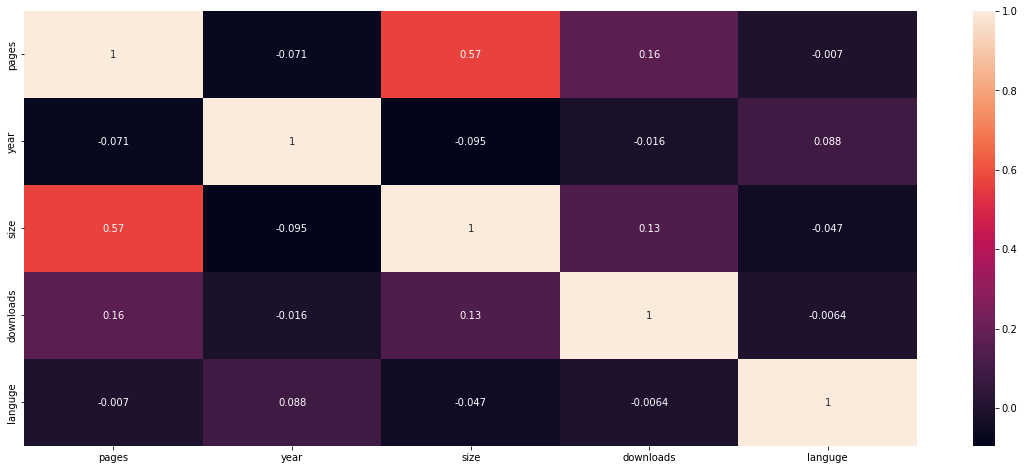

In [8]:
plt.figure(figsize=(20,8))
sns.heatmap(data=books.corr(), annot=True)

size and pages have relationshep,
we can drop size

# **setting of training data and normalization**

In [9]:
# Create target object and call it y
y = books.downloads
# Create X
features = ["pages","year","languge"]
X = books[features]
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X

,pages,year,languge
0,0.102948,0.985294,0.0
1,0.080721,0.980392,0.0
2,0.022227,0.997549,0.0
3,0.088676,0.985294,0.0
4,0.077211,0.990196,0.0
...,...,...,...
5669,0.007955,0.990196,0.0
5670,0.007955,0.960784,0.0
5671,0.007955,0.990196,0.0
5672,0.007955,0.990196,0.0


# **Random Forest Regressor**

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X,train_y = X,y

# Specify Model
iowa_model = RandomForestRegressor(random_state = 1)

# Fit Model
iowa_model.fit(X, y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))
rfr = iowa_model.score(val_X,val_y)
print("Score : ",rfr)

Validation MAE: 13
Score :  0.8472855385198642


In [12]:
books["prid"] = iowa_model.predict(X).astype(int)
df = pd.merge(val_y,books.prid, right_index = True,
               left_index = True)
df

,downloads,prid
3321,18,18
116,34,22
4341,0,1
582,2,6
1714,0,1
...,...,...
1697,1,1
2275,4,2
553,6,6
4595,2,1


# **Visualisation the results**

<AxesSubplot:>

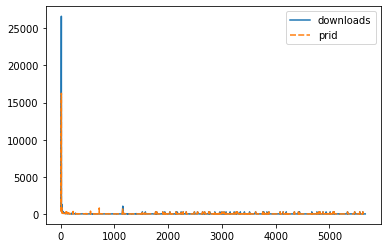

In [13]:
sns.lineplot(data=df)

<AxesSubplot:ylabel='Density'>

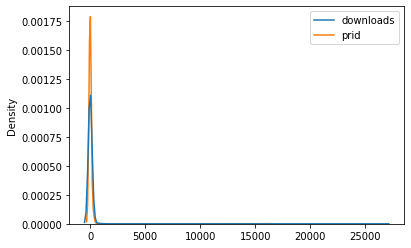

In [14]:
sns.kdeplot(data=df, shade=False)

<AxesSubplot:xlabel='downloads', ylabel='prid'>

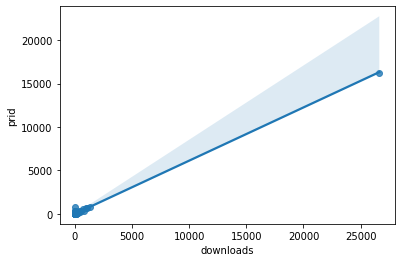

In [15]:
k = [x for x in range(len(books))]
sns.regplot(x=df['downloads'], y=df['prid'])

# **XGBoost**

In [16]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Create an XGBoost regressor
reg = XGBRegressor()

# Fit the model to the training data
train_X, train_y = X,y
reg.fit(train_X, train_y)

# Make predictions on the test data
y_pred = reg.predict(val_X)
val_mae = mean_absolute_error(y_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))
xg = reg.score(val_X,val_y)
print("Score : ",xg)

Validation MAE: 3
Score :  0.9994739035418877


In [17]:
df = pd.merge(pd.DataFrame(np.array(val_y)),pd.DataFrame(np.array(y_pred)), right_index = True,
               left_index = True)
df

,0_x,0_y
0,18,18.008884
1,34,16.524496
2,0,1.340778
3,2,5.984092
4,0,1.234259
...,...,...
1414,1,0.789535
1415,4,2.447328
1416,6,12.894814
1417,2,1.340778


<AxesSubplot:>

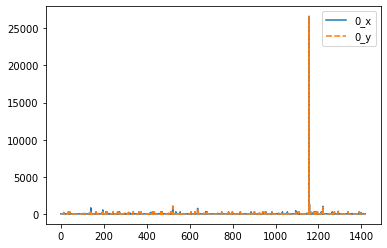

In [18]:
sns.lineplot(data=df)

<AxesSubplot:ylabel='Density'>

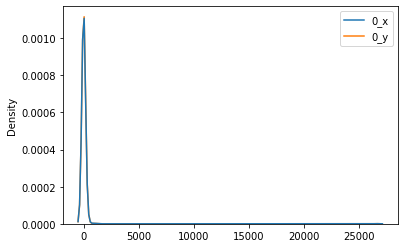

In [19]:
sns.kdeplot(data=df, shade=False)

<AxesSubplot:xlabel='0_x', ylabel='0_y'>

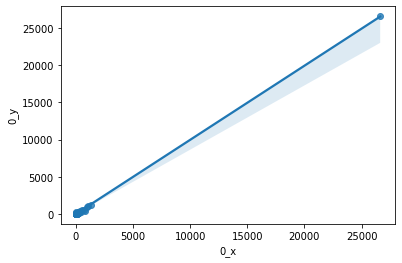

In [20]:
k = [x for x in range(len(df))]
sns.regplot(x=df['0_x'], y=df['0_y'])

# **<B>Linear Regression</B>**

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the training data
train_X, train_y = X,y
model.fit(train_X, train_y)

# Make predictions on the test data
y_pred = model.predict(val_X)
val_mae = mean_absolute_error(y_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))
lr = model.score(val_X,val_y)
print("Score : ",lr)

Validation MAE: 41
Score :  0.004833754611991425


In [22]:
df = pd.merge(pd.DataFrame(np.array(val_y)),pd.DataFrame(np.array(y_pred)), right_index = True,
               left_index = True)
df

,0_x,0_y
0,18,1.979818
1,34,44.317877
2,0,3.414435
3,2,210.588548
4,0,4.259729
...,...,...
1414,1,5.105023
1415,4,2.780464
1416,6,51.768752
1417,2,3.414435


<AxesSubplot:>

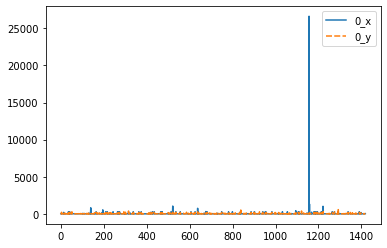

In [23]:
sns.lineplot(data=df)

<AxesSubplot:ylabel='Density'>

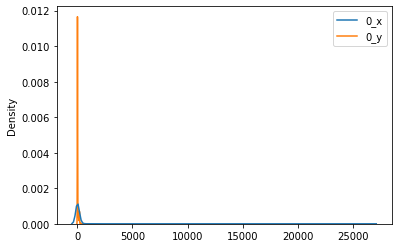

In [24]:
sns.kdeplot(data=df, shade=False)

<AxesSubplot:xlabel='0_x', ylabel='0_y'>

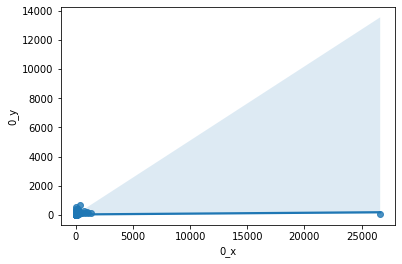

In [25]:
k = [x for x in range(len(df))]
sns.regplot(x=df['0_x'], y=df['0_y'])

# **Decision Tree Regressor**

In [26]:
from sklearn.tree import DecisionTreeRegressor 

model = DecisionTreeRegressor() 

# Fit the model to the training data
train_X, train_y = X,y
model.fit(train_X, train_y)

# Make predictions on the test data
y_pred = model.predict(val_X)
val_mae = mean_absolute_error(y_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))
dtr = model.score(val_X,val_y)
print("Score : ",dtr)

Validation MAE: 2
Score :  0.9995525904807594


In [27]:
df = pd.merge(pd.DataFrame(np.array(val_y)),pd.DataFrame(np.array(y_pred)), right_index = True,
               left_index = True)
df

,0_x,0_y
0,18,18.085973
1,34,24.500000
2,0,1.400000
3,2,2.000000
4,0,1.000000
...,...,...
1414,1,1.000000
1415,4,2.500000
1416,6,6.000000
1417,2,1.400000


<AxesSubplot:>

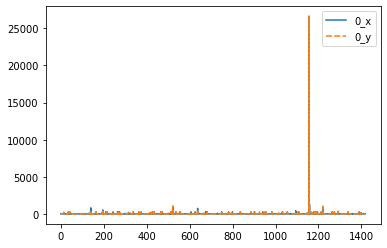

In [28]:
sns.lineplot(data=df)

<AxesSubplot:ylabel='Density'>

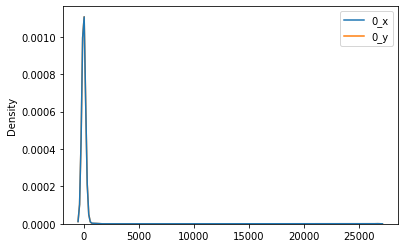

In [29]:
sns.kdeplot(data=df, shade=False)

<AxesSubplot:xlabel='0_x', ylabel='0_y'>

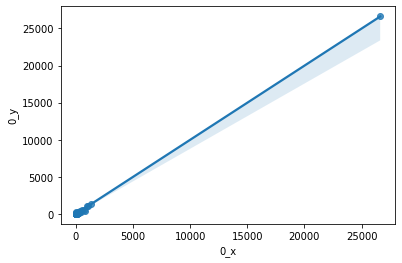

In [30]:
k = [x for x in range(len(df))]
sns.regplot(x=df['0_x'], y=df['0_y'])

# **K Neighbors Regressor**

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# create KKNeighborsRegressor object with initial value of n =2
model = KNeighborsRegressor(n_neighbors=2)

# fit the regressor with x and y data
train_X, train_y = X,y
model.fit(train_X, train_y)

# Make predictions on the test data
y_pred = model.predict(val_X)
val_mae = mean_absolute_error(y_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))
print('Score For Test Data : {}'.format(model.score(val_X,val_y)))
knn = model.score(val_X,val_y)

Validation MAE: 15
Score For Test Data : 0.7511777409994163


In [32]:
df = pd.merge(pd.DataFrame(np.array(val_y)),pd.DataFrame(np.array(y_pred)), right_index = True,
               left_index = True)
df

,0_x,0_y
0,18,18.0
1,34,24.5
2,0,1.0
3,2,1.0
4,0,1.0
...,...,...
1414,1,1.0
1415,4,4.0
1416,6,6.5
1417,2,1.0


<AxesSubplot:>

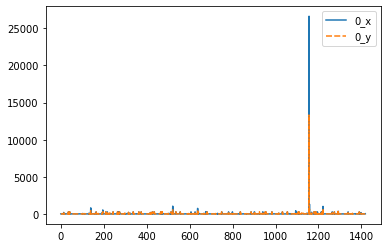

In [33]:
sns.lineplot(data=df)

<AxesSubplot:ylabel='Density'>

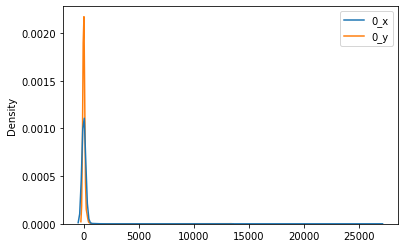

In [34]:
sns.kdeplot(data=df, shade=False)

<AxesSubplot:xlabel='0_x', ylabel='0_y'>

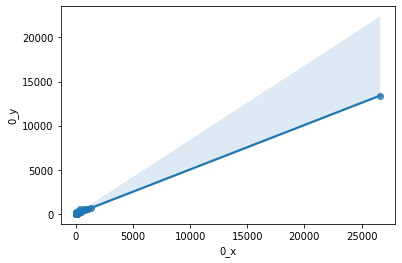

In [35]:
k = [x for x in range(len(df))]
sns.regplot(x=df['0_x'], y=df['0_y'])

> # **ALL SCORES OF MODELS**

In [36]:
print(" Linear Regression\t\t",lr,"\n",
      '*Decision Tree Regression\t',dtr,"\n",
      'Random Forest Regression\t',rfr,"\n",
      'KNeighborsRegressor\t\t',knn,"\n",
      'XGBoost Regression\t\t',xg)

 Linear Regression		 0.004833754611991425 
 *Decision Tree Regression	 0.9995525904807594 
 Random Forest Regression	 0.8472855385198642 
 KNeighborsRegressor		 0.7511777409994163 
 XGBoost Regression		 0.9994739035418877


*Decision Tree Regression is the best*